In [1]:
#Import dataset and libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics

# Dataset Preparation

In [2]:
#Dataset loading
wine_dataframe = pd.read_csv('datatest.csv', index_col=0)

#dataset cleaning
wine_dataframe = wine_dataframe.drop('URLS', axis=1)
wine_dataframe = wine_dataframe.drop('Tranquille to Mousseux', axis=1)

# Small adjustments concerning data types ,...
wine_dataframe['Léger to Puissant'] = wine_dataframe['Léger to Puissant'].str.replace(';', '')
wine_dataframe['Souple to Tannique'] = wine_dataframe['Souple to Tannique'].str.replace(';', '')
wine_dataframe['Sec to Moelleux'] = wine_dataframe['Sec to Moelleux'].str.replace(';', '')
wine_dataframe['Doux to Acide'] = wine_dataframe['Doux to Acide'].str.replace(';', '')
wine_dataframe['Léger to Puissant'] = wine_dataframe['Léger to Puissant'].astype(float)
wine_dataframe['Souple to Tannique'] = wine_dataframe['Souple to Tannique'].astype(float)
wine_dataframe['Sec to Moelleux'] = wine_dataframe['Sec to Moelleux'].astype(float)
wine_dataframe['Doux to Acide'] = wine_dataframe['Doux to Acide'].astype(float)

# Small adjustments concerning aromas
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace('/+', '+', regex=True)
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace(',+', '+', regex=True)
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace('/+', '+', regex=True)
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace(',+', '+', regex=True)
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace('Ã©', 'é', regex=True)
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace('Ã‰', 'é', regex=True)
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace('Ã©', 'é', regex=True)
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace('Ã‰', 'é', regex=True)
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.lower()
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.lower()
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.lstrip('+')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.lstrip('+')
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.split('+')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.split('+')

wine_dataframe['Aromas'] = wine_dataframe['Aromas'].apply(lambda x: [] if isinstance(x, float) else x)
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].apply(lambda x: [] if isinstance(x, float) else x)

In [3]:
#transformation of word lists for aromas into columns of binary variables. 
mlb = MultiLabelBinarizer()
Aromas_one_hot_encoded = mlb.fit_transform(wine_dataframe['Aromas'])
Aromas_df_encoded = pd.DataFrame(Aromas_one_hot_encoded, columns=mlb.classes_)
Olphactive_one_hot_encoded = mlb.fit_transform(wine_dataframe['Olphactive'])
Olphactive_df_encoded = pd.DataFrame(Olphactive_one_hot_encoded, columns=mlb.classes_)
df_concatenated_0 = pd.concat([wine_dataframe, Aromas_df_encoded], axis=1)
df_concatenated = pd.concat([df_concatenated_0, Olphactive_df_encoded], axis=1)

df_concatenated.drop('Aromas', axis=1, inplace=True)
df_concatenated.drop('Olphactive', axis=1, inplace=True)

In [4]:
#remove the observations for which all continuous values are missing
mask = (df_concatenated['Léger to Puissant'] != 0) | (df_concatenated['Souple to Tannique'] != 0) | (df_concatenated['Sec to Moelleux'] != 0) | (df_concatenated['Doux to Acide'] != 0)
df_concatenated = df_concatenated[mask]

# Datset Split

In [5]:
#Split the varieties and the parameters
X = df_concatenated.drop('Cépages', axis=1)
y = df_concatenated['Cépages']

#Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=42)

In [6]:
#Scale the data 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Prediction

In [ ]:
# Building a random forest model
rf = RandomForestClassifier()

#Selection of model parameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt']
}

# Fitting and predicting with GridSearch
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred))

In [39]:
print('Best hyperparameters:', grid_search.best_params_)
print('Accuracy score:', grid_search.best_score_)

Best hyperparameters: {'max_depth': None, 'max_features': 'auto', 'n_estimators': 300}
Accuracy score: 0.924140371498799


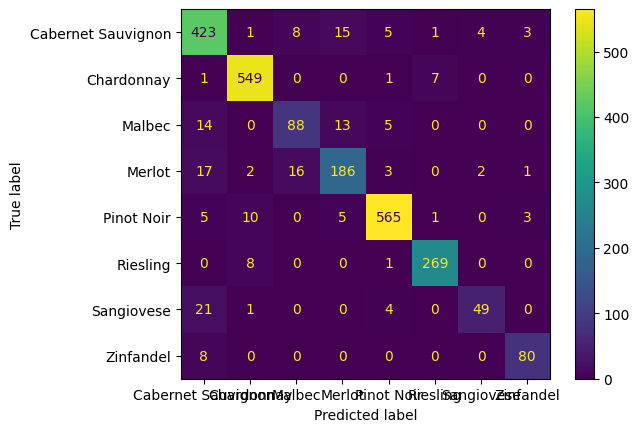

In [40]:
#Creation of a confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Cabernet Sauvignon" , "Chardonnay","Malbec","Merlot","Pinot Noir","Riesling","Sangiovese","Zinfandel"])

cm_display.plot()
plt.show()